########################################################<br>
 Python script template for Question 1 (IAML Level 10)<br>
 Note that<br>
 - You should not change the name of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.<br>
 - You should write code for the functions defined below. Do not change their names.<br>
 - You can define function arguments (parameters) and returns (attributes) if necessary.<br>
 - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.<br>
 - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.<br>
 - You do not need to include this header in your submission.<br>
########################################################

-- Code for loading modules and the data set and pre-processing ---><br>
NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

In [1]:
import time
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from iaml01cw2_helpers import *
from iaml01cw2_my_helpers import *

C:\Users\Petros Laptop\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
data_path = os.path.join(os.getcwd(), 'data')
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(data_path)
print(Xtrn.shape)
print(Ytrn.shape)
print(Xtst.shape)
print(Ytst.shape)
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()
Xtrn /= 255.0
Xtst /= 255.0
Xmean = np.mean(Xtrn, axis=0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

(60000, 784)
(60000,)
(10000, 784)
(10000,)


----

Q1.1

In [3]:
def iaml01cw2_q1_1():
    
    print(Xtrn_nm[0][:4])
    print(Xtrn_nm[-1][:4])
    
iaml01cw2_q1_1()  

[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


Q1.2

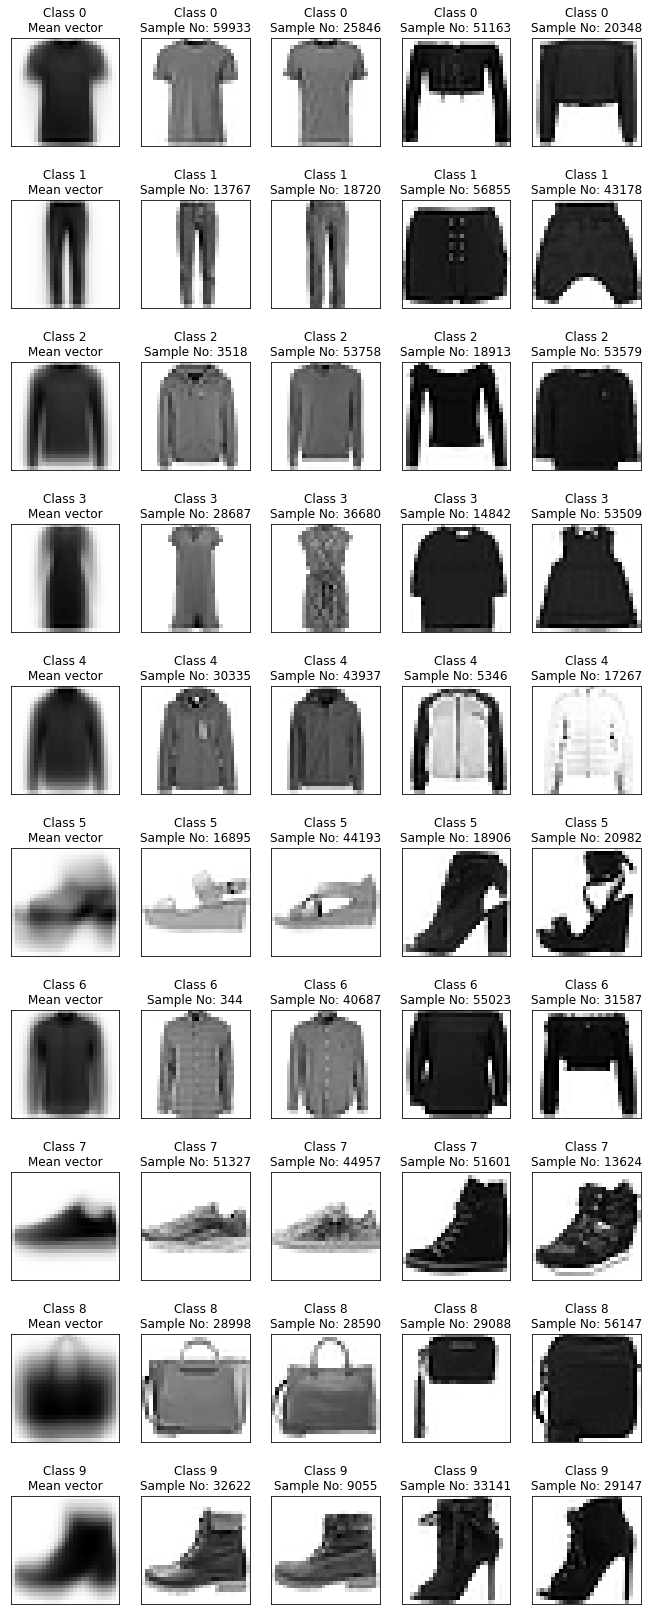

Total time taken = 1.8483436107635498


In [4]:
def iaml01cw2_q1_2():
    
    classes = np.unique(Ytrn)
    fig, ax = plt.subplots(10, 5, figsize=(10, 15))
    
    for class_label in classes:
       
        class_samples = []
        orig_idxs = []
        for idx in range(len(Xtrn)):
            sample_label = Ytrn[idx]
            if(sample_label==class_label):
                class_samples.append(Xtrn[idx])
                orig_idxs.append(idx)
                
        class_samples = np.array(class_samples)
        orig_idxs = np.array(orig_idxs)
        class_mean = np.mean(class_samples, axis=0)
        distances = np.linalg.norm(class_samples - class_mean, axis=1)
        
        mean_img = class_mean.reshape(28,28)
        ax[class_label][0].imshow(mean_img, cmap='gray_r', aspect='equal')
        ax[class_label][0].set_title(f'Class {class_label}\nMean vector', fontsize=12)
        
        pos = [0,1,-1,-2]
        for i in range(len(pos)):
            img, idx = get_image(pos[i], distances, class_samples)
            orig_idx = orig_idxs[idx]
            img = img.reshape(28,28)
            ax[class_label][i+1].imshow(img, cmap='gray_r', aspect='equal')
            ax[class_label][i+1].set_title(f'Class {class_label}\nSample No: {orig_idx}', fontsize=12)
    
    #plt.tight_layout()
    plt.subplots_adjust(right=1, top=1.6)
    for row in range(ax.shape[0]):
        for col in range(ax.shape[1]):
            ax[row][col].set_xticks([])
            ax[row][col].set_yticks([])
    plt.show()
    
t1 = time.time()
iaml01cw2_q1_2()   
t3 = time.time()
print(f"Total time taken = {t3-t1}")

Q1.3

In [17]:
def iaml01cw2_q1_3():
    
    pca = PCA(n_components=5)  
    pca = pca.fit(Xtrn_nm)
    var = pca.explained_variance_
    var_perc = pca.explained_variance_ratio_
    for pc in range(5):
        print(f'For Principal Component {pc}, the variance is {var[pc]:.3f}, which is {var_perc[pc]*100:.3f}% of total variance.')

t1 = time.time()
iaml01cw2_q1_3()   
t3 = time.time()
print(f"Total time taken = {t3-t1}")

For Principal Component 0, the variance is 19.810, which is 29.039% of total variance.
For Principal Component 1, the variance is 12.112, which is 17.755% of total variance.
For Principal Component 2, the variance is 4.106, which is 6.019% of total variance.
For Principal Component 3, the variance is 3.382, which is 4.957% of total variance.
For Principal Component 4, the variance is 2.625, which is 3.848% of total variance.
Total time taken = 1.8501074314117432


Q1.4

(784,)
(784,)


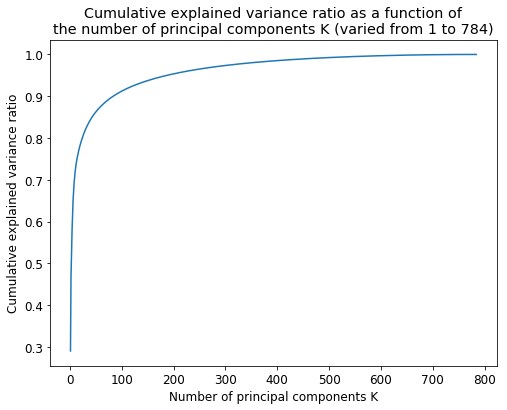

Total time taken = 6.050453186035156


In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

def iaml01cw2_q1_4():
    
    ks = np.arange(1,785,1)
    ratios = np.zeros(len(ks))
    print(ks.shape)
    pca = PCA(n_components=ks[-1])  
    pca = pca.fit(Xtrn_nm) 
    var_perc = pca.explained_variance_ratio_
    print(var_perc.shape)
    
    for i in range(len(ks)):
        cumulative = np.sum(var_perc[:i+1])
        ratios[i] = cumulative
    
    plt.plot(ks,ratios)
    plt.ylabel("Cumulative explained variance ratio")
    plt.xlabel("Number of principal components K")
    plt.title("Cumulative explained variance ratio as a function of\nthe number of principal components K (varied from 1 to 784)")
    #plt.xticks(ks[::100])
    plt.show()

t1 = time.time()
iaml01cw2_q1_4()   
t3 = time.time()
print(f"Total time taken = {t3-t1}") 

Q1.5

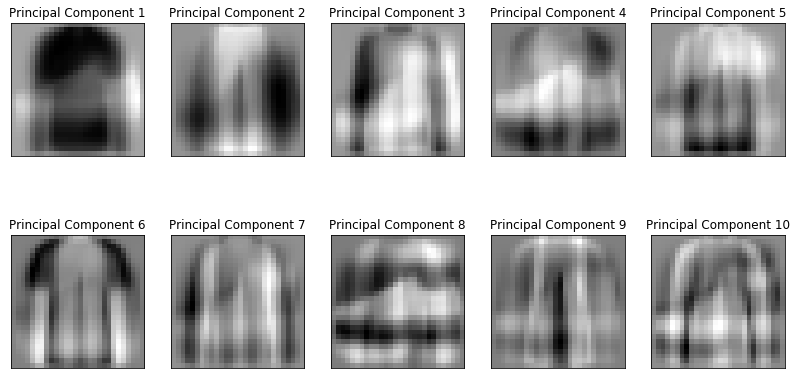

In [7]:
plt.rcParams['figure.figsize'] = (10, 8)

def iaml01cw2_q1_5():
    
    fig, ax = plt.subplots(2, 5)
    pca = PCA(n_components=10)  
    pca = pca.fit(Xtrn_nm)  
    pcs = pca.components_
    
    for pc in range(len(pcs)):
        img = pcs[pc].reshape(28,28)
        ax[int(pc/5)][pc%5].imshow(img, cmap='gray_r', aspect='equal')
        ax[int(pc/5)][pc%5].set_title(f'Principal Component {pc+1}', fontsize=12)
    
    #plt.tight_layout()
    plt.subplots_adjust(right=1.2, top=0.8)
    for row in range(ax.shape[0]):
        for col in range(ax.shape[1]):
            ax[row][col].set_xticks([])
            ax[row][col].set_yticks([])
    plt.show()
        
iaml01cw2_q1_5()   

Q1.6

In [8]:
def iaml01cw2_q1_6():
    
    ks = [5,20,50,200]
    first_samples = get_first_samples(Xtrn_nm, Ytrn)
    #print(first_samples.shape)
    
    reconstructed_samples = []
    for k in ks:
        print(f"\nWith k={k}")
        pca = PCA(n_components=k) 
        pca = pca.fit(Xtrn_nm)
        transformed = pca.transform(first_samples)
        #print(transformed.shape)
        
        for i in range(10):
            print(f"For class {i}")
            sample = first_samples[i]
            reconstructed = pca.inverse_transform(transformed[i])
            rmse = np.sqrt(mean_squared_error(sample, reconstructed))
            reconstructed_samples.append(reconstructed)
            print(f"The RMSE = {rmse:.3f}")
    
    reconstructed_samples = np.array(reconstructed_samples)
    
    return first_samples, reconstructed_samples, ks

Q1.7


With k=5
For class 0
The RMSE = 0.256
For class 1
The RMSE = 0.198
For class 2
The RMSE = 0.199
For class 3
The RMSE = 0.146
For class 4
The RMSE = 0.118
For class 5
The RMSE = 0.181
For class 6
The RMSE = 0.129
For class 7
The RMSE = 0.166
For class 8
The RMSE = 0.223
For class 9
The RMSE = 0.184

With k=20
For class 0
The RMSE = 0.150
For class 1
The RMSE = 0.140
For class 2
The RMSE = 0.146
For class 3
The RMSE = 0.107
For class 4
The RMSE = 0.103
For class 5
The RMSE = 0.159
For class 6
The RMSE = 0.096
For class 7
The RMSE = 0.128
For class 8
The RMSE = 0.145
For class 9
The RMSE = 0.151

With k=50
For class 0
The RMSE = 0.128
For class 1
The RMSE = 0.095
For class 2
The RMSE = 0.123
For class 3
The RMSE = 0.083
For class 4
The RMSE = 0.088
For class 5
The RMSE = 0.142
For class 6
The RMSE = 0.073
For class 7
The RMSE = 0.107
For class 8
The RMSE = 0.123
For class 9
The RMSE = 0.123

With k=200
For class 0
The RMSE = 0.061
For class 1
The RMSE = 0.037
For class 2
The RMSE = 0.079

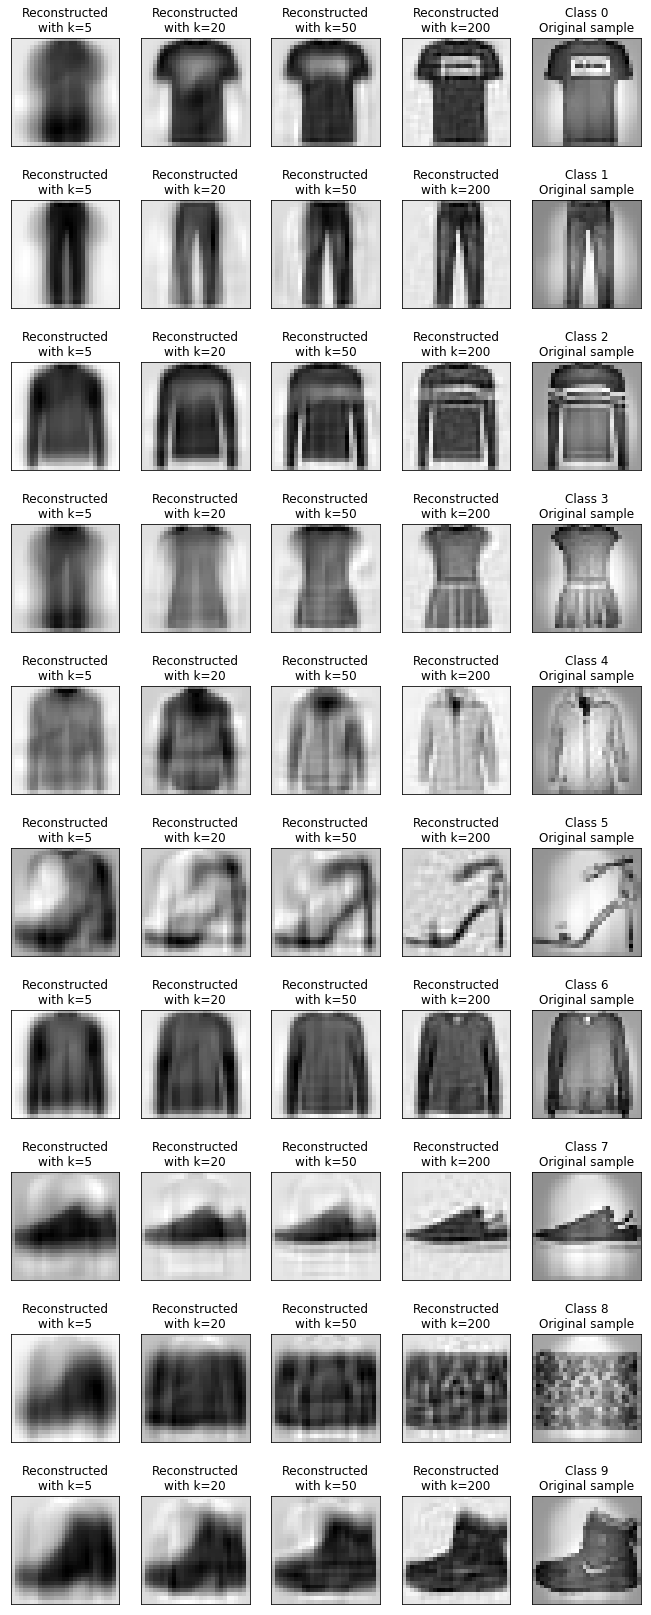

In [9]:
def iaml01cw2_q1_7():
    
    first_samples, reconstructed_samples, ks = iaml01cw2_q1_6() 
    print(reconstructed_samples.shape)
    fig, ax = plt.subplots(10, 5, figsize=(10, 15))
    
    for i in range(len(first_samples)):
        
        img = first_samples[i].reshape(28,28)
        ax[i][-1].imshow(img, cmap='gray_r', aspect='equal')  
        ax[i][-1].set_title(f'Class {i}\nOriginal sample', fontsize=12)
        
        for j in range(int(len(reconstructed_samples)/len(first_samples))):
            #print(f"{i},{i + j*10}")
            img = reconstructed_samples[i + j*10] + Xmean
            img = img.reshape(28,28)
            ax[i][j].imshow(img, cmap='gray_r', aspect='equal')  #col = k
            ax[i][j].set_title(f'Reconstructed\nwith k={ks[j]}', fontsize=12)
    
    plt.subplots_adjust(right=1, top=1.6)
    for row in range(ax.shape[0]):
        for col in range(ax.shape[1]):
            ax[row][col].set_xticks([])
            ax[row][col].set_yticks([])
    plt.show() 

iaml01cw2_q1_7()  

Q1.8

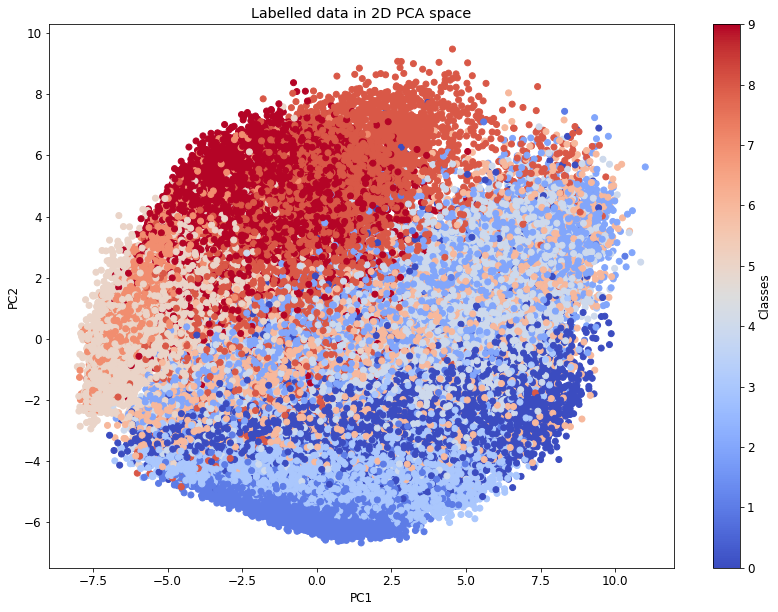

Total time taken = 3.351654529571533


In [16]:
plt.rcParams['figure.figsize'] = (14, 10)

def iaml01cw2_q1_8():
    
    fig, ax = plt.subplots()
    pca = PCA(n_components=2)  
    X_2d = pca.fit_transform(Xtrn_nm)
    
    pc1 = X_2d[:,0]
    pc2 = X_2d[:,1]
    
    plt.scatter(pc1,pc2, c=Ytrn, cmap='coolwarm') 
    plt.title('Labelled data in 2D PCA space')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
#     legend = ax.legend( ([scatter]*10),(np.unique(Ytrn)), title="Classes")
#     ax.add_artist(legend)
    cb = plt.colorbar(label = 'Classes')
    plt.show()
    
t1 = time.time()
iaml01cw2_q1_8()   
t3 = time.time()
print(f"Total time taken = {t3-t1}") 